In [1]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_profiling as pp
import missingno as mno
from sklearn import linear_model
from prettytable import PrettyTable
import random
from missingpy import MissForest
from sklearn import tree
from math import floor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Data Modeling

In [10]:
#getting features 
features = ['age', 'sex', 'cp', 'trtbps', 'chol','fbs', 'restecg', 'thalachh', 'exng', 
            'oldpeak', 'slp', 'caa', 'thall']
x = heart[features]

# Getting Predicting Value
y = heart['output']

In [11]:
# Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/11, random_state = 242)

In [12]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    lda = LinearDiscriminantAnalysis()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    lda.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    lda_pred = lda.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_lda = accuracy_score(yt, lda_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    
    # Getting F1 score
    f1_logisreg = f1_score(yt, logi_pred,average='weighted')
    f1_lda = f1_score(yt, lda_pred, average='weighted')
    f1_ganb = f1_score(yt, gnb_pred, average='weighted')
    f1_dtree = f1_score(yt, dtc_pred, average='weighted')
    f1_rf = f1_score(yt, rfc_pred, average='weighted')
    f1_svc = f1_score(yt, svm_pred, average='weighted')
    f1_knn = f1_score(yt, knn_pred,average='weighted')
    
    # MOdel Accuracy Score Selection
    models_acc = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Accuracy_Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models_acc.sort_values(by='Accuracy_Score', ascending=False))
    sns.barplot(x = models_acc['Accuracy_Score'], y = models_acc['Model'], palette='viridis');

    
    # MOdel F1 Score Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'F1_Score': [f1_logisreg, f1_lda, f1_ganb, f1_dtree, f1_rf, f1_svc, f1_knn]})

    print(models.sort_values(by='F1_Score', ascending=False))
    sns.barplot(x = models['F1_Score'], y = models['Model'], palette='viridis');

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


                          Model  Accuracy_Score
0           Logistic Regression        0.892857
2                   Naive Bayes        0.857143
4                 Random Forest        0.821429
1  Linear Discriminant Analysis        0.785714
3                 Decision Tree        0.642857
5       Support Vector Machines        0.642857
6         K - Nearest Neighbors        0.464286
                          Model  F1_Score
0           Logistic Regression  0.893268
2                   Naive Bayes  0.857143
4                 Random Forest  0.820288
1  Linear Discriminant Analysis  0.782418
3                 Decision Tree  0.627976
5       Support Vector Machines  0.614209
6         K - Nearest Neighbors  0.460865


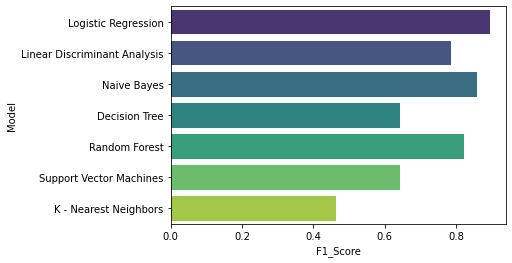

In [13]:
Classification_models(x_train, y_train, x_test, y_test)

## 20% imputation

In [14]:
heart_orig = df.copy()

In [15]:
data_1 = df.copy()

In [16]:
data_1 = data_1.iloc[:,0:13].mask(np.random.random(data_1.iloc[:,0:13].shape) < .2)
data_1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63.0,1.0,3.0,145.0,233.0,NaN,0.0,150.0,0.0,2.3,0.0,0.0,NaN
1,NaN,1.0,NaN,130.0,NaN,0.0,1.0,187.0,0.0,3.5,NaN,0.0,2.0
2,NaN,0.0,1.0,130.0,204.0,0.0,0.0,NaN,0.0,1.4,NaN,0.0,2.0
3,56.0,NaN,NaN,NaN,236.0,0.0,1.0,NaN,NaN,0.8,2.0,0.0,2.0
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,NaN,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,NaN,1.0,NaN,3.0
299,45.0,NaN,NaN,110.0,264.0,0.0,1.0,132.0,NaN,1.2,1.0,NaN,NaN
300,68.0,1.0,0.0,144.0,193.0,1.0,NaN,141.0,0.0,NaN,1.0,2.0,NaN
301,57.0,1.0,0.0,NaN,131.0,0.0,NaN,NaN,1.0,1.2,1.0,1.0,NaN


In [17]:
data_1['output'] = df['output']
df_one = data_1.copy()

In [18]:
df_one.isnull().sum()

age         73
sex         60
cp          54
trtbps      73
chol        76
fbs         56
restecg     64
thalachh    65
exng        62
oldpeak     66
slp         61
caa         70
thall       63
output       0
dtype: int64

### Using KNN imputer

In [19]:
df_knn_c = df_one.copy()
df_knn_c['output'] = df_knn_c['output'].astype('category')

In [20]:
df_knn_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       230 non-null    float64 
 1   sex       243 non-null    float64 
 2   cp        249 non-null    float64 
 3   trtbps    230 non-null    float64 
 4   chol      227 non-null    float64 
 5   fbs       247 non-null    float64 
 6   restecg   239 non-null    float64 
 7   thalachh  238 non-null    float64 
 8   exng      241 non-null    float64 
 9   oldpeak   237 non-null    float64 
 10  slp       242 non-null    float64 
 11  caa       233 non-null    float64 
 12  thall     240 non-null    float64 
 13  output    303 non-null    category
dtypes: category(1), float64(13)
memory usage: 31.3 KB


In [21]:
df_knn_c.isnull().sum()

age         73
sex         60
cp          54
trtbps      73
chol        76
fbs         56
restecg     64
thalachh    65
exng        62
oldpeak     66
slp         61
caa         70
thall       63
output       0
dtype: int64

In [22]:
df_knn = df_knn_c.drop('output',axis=1)
df_knn

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63.0,1.0,3.0,145.0,233.0,NaN,0.0,150.0,0.0,2.3,0.0,0.0,NaN
1,NaN,1.0,NaN,130.0,NaN,0.0,1.0,187.0,0.0,3.5,NaN,0.0,2.0
2,NaN,0.0,1.0,130.0,204.0,0.0,0.0,NaN,0.0,1.4,NaN,0.0,2.0
3,56.0,NaN,NaN,NaN,236.0,0.0,1.0,NaN,NaN,0.8,2.0,0.0,2.0
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,NaN,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,NaN,1.0,NaN,3.0
299,45.0,NaN,NaN,110.0,264.0,0.0,1.0,132.0,NaN,1.2,1.0,NaN,NaN
300,68.0,1.0,0.0,144.0,193.0,1.0,NaN,141.0,0.0,NaN,1.0,2.0,NaN
301,57.0,1.0,0.0,NaN,131.0,0.0,NaN,NaN,1.0,1.2,1.0,1.0,NaN


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df_output = pd.DataFrame(imputer.fit_transform(df_knn),columns = df_knn.columns)
df_transform = pd.DataFrame(scaler.inverse_transform(df_output), columns= df_output.columns)

In [25]:
heart_orig

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Now evaluating KNN imputer using absolute error

In [27]:
# Add imputed values as columns to the untouched dataset
heart_orig['knn_age'] = df_transform['age']
heart_orig['knn_chol'] = df_transform['chol']
heart_orig['knn_cp'] = df_transform['cp']
heart_orig['knn_trtbps'] = df_transform['trtbps']
comparison_df = heart_orig[['age', 'knn_age', 'chol' , 'knn_chol' , 'cp' , 'knn_cp' , 'trtbps', 'knn_trtbps']]


In [28]:
# Calculate absolute errors
comparison_df['ABS_ERROR_age'] = round(np.abs(comparison_df['age'] - comparison_df['knn_age']),3)
comparison_df['ABS_ERROR_chol'] = round(np.abs(comparison_df['chol'] - comparison_df['knn_chol']),3)
comparison_df['ABS_ERROR_cp'] = round(np.abs(comparison_df['cp'] - comparison_df['knn_cp']),3)
comparison_df['ABS_ERROR_trtbps'] = round(np.abs(comparison_df['trtbps'] - comparison_df['knn_trtbps']),3)

comparison_df.head(50)

<ipython-input-28-a11631beb32e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['ABS_ERROR_age'] = round(np.abs(comparison_df['age'] - comparison_df['knn_age']),3)
<ipython-input-28-a11631beb32e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['ABS_ERROR_chol'] = round(np.abs(comparison_df['chol'] - comparison_df['knn_chol']),3)
<ipython-input-28-a11631beb32e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,age,knn_age,chol,knn_chol,cp,knn_cp,trtbps,knn_trtbps,ABS_ERROR_age,ABS_ERROR_chol,ABS_ERROR_cp,ABS_ERROR_trtbps
0,63,63.0,233,233.0,3,3.0,145,145.0,0.0,0.0,0.0,0.0
1,37,51.1,250,249.6,2,1.0,130,130.0,14.1,0.4,1.0,0.0
2,41,49.1,204,204.0,1,1.0,130,130.0,8.1,0.0,0.0,0.0
3,56,56.0,236,236.0,1,1.3,120,125.6,0.0,0.0,0.3,5.6
4,57,59.0,354,354.0,0,0.0,120,120.0,2.0,0.0,0.0,0.0
5,57,57.0,192,192.0,0,0.0,140,140.0,0.0,0.0,0.0,0.0
6,56,56.0,294,244.8,1,1.0,140,140.0,0.0,49.2,0.0,0.0
7,44,44.0,263,263.0,1,1.0,120,120.0,0.0,0.0,0.0,0.0
8,52,52.0,199,237.2,2,0.9,172,172.0,0.0,38.2,1.1,0.0
9,57,57.0,168,250.2,2,1.7,150,150.0,0.0,82.2,0.3,0.0


### Decision Tree imputation

In [29]:
heart_orig = df.copy()
df_dt_c = df_one.copy()
df_dt_c['output'] = df_dt_c['output'].astype('category')

In [30]:
df_dt_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       230 non-null    float64 
 1   sex       243 non-null    float64 
 2   cp        249 non-null    float64 
 3   trtbps    230 non-null    float64 
 4   chol      227 non-null    float64 
 5   fbs       247 non-null    float64 
 6   restecg   239 non-null    float64 
 7   thalachh  238 non-null    float64 
 8   exng      241 non-null    float64 
 9   oldpeak   237 non-null    float64 
 10  slp       242 non-null    float64 
 11  caa       233 non-null    float64 
 12  thall     240 non-null    float64 
 13  output    303 non-null    category
dtypes: category(1), float64(13)
memory usage: 31.3 KB


In [36]:
df_dt_c.isnull().sum()

age         73
sex         60
cp          54
trtbps      73
chol        76
fbs         56
restecg     64
thalachh    65
exng        62
oldpeak     66
slp         61
caa         70
thall       63
output       0
dtype: int64

In [38]:
df_dt = df_dt_c
df_dt

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,NaN,0.0,150.0,0.0,2.3,0.0,0.0,NaN,1
1,NaN,1.0,NaN,130.0,NaN,0.0,1.0,187.0,0.0,3.5,NaN,0.0,2.0,1
2,NaN,0.0,1.0,130.0,204.0,0.0,0.0,NaN,0.0,1.4,NaN,0.0,2.0,1
3,56.0,NaN,NaN,NaN,236.0,0.0,1.0,NaN,NaN,0.8,2.0,0.0,2.0,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,NaN,2.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,NaN,1.0,NaN,3.0,0
299,45.0,NaN,NaN,110.0,264.0,0.0,1.0,132.0,NaN,1.2,1.0,NaN,NaN,0
300,68.0,1.0,0.0,144.0,193.0,1.0,NaN,141.0,0.0,NaN,1.0,2.0,NaN,0
301,57.0,1.0,0.0,NaN,131.0,0.0,NaN,NaN,1.0,1.2,1.0,1.0,NaN,0


In [39]:
#Standardize numerical Values
def standardize_col(col):
    return (col - col.min()) * 1.0 / (col.max() - col.min())

In [40]:
#order the columns of the dataframe according to decreasing number of null values, return list of column names
def ordered_cols(df):
    x = df.isna().sum()
    x = x.sort_values()
    x = x.to_frame()
    columns_sorted = x.index.values
    return list(columns_sorted)

In [41]:
class DecisionTree(object):
    """
    Class to create decision tree model (CART)
    """
    def __init__(self, _max_depth, _min_splits):
        self.max_depth = _max_depth
        self.min_splits = _min_splits

    def fit(self, _feature, _label):
        """
        :param _feature:
        :param _label:
        :return:
        """
        self.feature = _feature
        self.label = _label
        self.train_data = np.column_stack((self.feature,self.label))
        self.build_tree()


    def compute_gini_similarity(self, groups, class_labels):
        """
        compute the gini index for the groups and class labels
        :param groups:
        :param class_labels:
        :return:
        """
        num_sample = sum([len(group) for group in groups])
        gini_score = 0

        for group in groups:
            size = float(len(group))

            if size == 0:
                continue
            score = 0.0
            for label in class_labels:
                porportion = (group[:,-1] == label).sum() / size
                score += porportion * porportion
            gini_score += (1.0 - score) * (size/num_sample)

        return gini_score

    def terminal_node(self, _group):
        """
        Function set terminal node as the most common class in the group to make prediction later on
        is an helper function used to mark the leaf node in the tree based on the early stop condition
        or actual stop condition which ever is meet early
        :param _group:
        :return:
        """
        class_labels, count = np.unique(_group[:,-1], return_counts= True)
        return class_labels[np.argmax(count)]

    def split(self, index, val, data):
        """
        split features into two groups based on their values
        :param index:
        :param val:
        :param data:
        :return:
        """
        data_left = np.array([]).reshape(0,self.train_data.shape[1])
        data_right = np.array([]).reshape(0, self.train_data.shape[1])

        for row in data:
            if row[index] <= val :
                data_left = np.vstack((data_left,row))

            if row[index] > val:
                data_right = np.vstack((data_right, row))

        return data_left, data_right

    def best_split(self, data):
        """
        find the best split information using the gini score
        :param data:
        :return best_split result dict:
        """
        class_labels = np.unique(data[:,-1])
        best_index = 999
        best_val = 999
        best_score = 999
        best_groups = None

        for idx in range(data.shape[1]-1):
            for row in data:
                groups = self.split(idx, row[idx], data)
                gini_score = self.compute_gini_similarity(groups,class_labels)

                if gini_score < best_score:
                    best_index = idx
                    best_val = row[idx]
                    best_score = gini_score
                    best_groups = groups
        result = {}
        result['index'] = best_index
        result['val'] = best_val
        result['groups'] = best_groups
        return result


    def split_branch(self, node, depth):
        """
        recursively split the data and
        check for early stop argument based on self.max_depth and self.min_splits
        - check if left or right groups are empty is yess craete terminal node
        - check if we have reached max_depth early stop condition if yes create terminal node
        - Consider left node, check if the group is too small using min_split condition
            - if yes create terminal node
            - else continue to build the tree
        - same is done to the right side as well.
        else
        :param node:
        :param depth:
        :return:
        """
        left_node , right_node = node['groups']
        del(node['groups'])

        if not isinstance(left_node,np.ndarray) or not isinstance(right_node,np.ndarray):
            node['left'] = self.terminal_node(left_node + right_node)
            node['right'] = self.terminal_node(left_node + right_node)
            return

        if depth >= self.max_depth:
            node['left'] = self.terminal_node(left_node)
            node['right'] = self.terminal_node(right_node)
            return

        if len(left_node) <= self.min_splits:
            node['left'] = self.terminal_node(left_node)
        else:
            node['left'] = self.best_split(left_node)
            self.split_branch(node['left'],depth + 1)


        if len(right_node) <= self.min_splits:
            node['right'] = self.terminal_node(right_node)
        else:
            node['right'] = self.best_split(right_node)
            self.split_branch(node['right'],depth + 1)

    def build_tree(self):
        """
        build tree recursively with help of split_branch function
         - Create a root node
         - call recursive split_branch to build the complete tree
        :return:
        """
        self.root = self.best_split(self.train_data)
        self.split_branch(self.root, 1)
        return self.root

    def _predict(self, node, row):
        """
        Recursively traverse through the tress to determine the
        class of unseen sample data point during prediction
        :param node:
        :param row:
        :return:
        """
        if row[node['index']] < node['val']:
            if isinstance(node['left'], dict):
                return self._predict(node['left'], row)
            else:
                return node['left']

        else:
            if isinstance(node['right'],dict):
                return self._predict(node['right'],row)
            else:
                return node['right']

    def predict(self, test_data):
        """
        predict the set of data point
        :param test_data:
        :return:
        """
        self.predicted_label = np.array([])
        for idx in test_data:
            self.predicted_label = np.append(self.predicted_label, self._predict(self.root,idx))

        return self.predicted_label

In [42]:
def impute(df):
  #initial imputed values
  
  Z = np.matrix(df['output']).reshape(-1,1)
  indexes_dict = {}
  
  #Get ordered list of col names except the session id which is always filled
  col_partial = ordered_cols(df.loc[:, df.columns != 'output'])
  col_list = col_partial
#   print(col_partial)
  
  
  for col in col_partial:
  #   print(col)
    y  = df[col]
  #   print(type(y))
    pos = list(y[y.isnull()].index)
  #   print(pos)
    indexes_dict[col] = pos

    X_train = np.delete(Z, pos, axis=0)
    X_test = Z[pos, :]
    y_train = np.matrix(y.drop(y.index[pos])).reshape(Z.shape[0]-len(pos),1)

    y_final = np.matrix(y).reshape(Z.shape[0],1)

  #   print(y.values.reshape(Z.shape[0],1)[pos[0]])
  #   X_test = Z.loc[pos].values#.reshape(1,-1)
  #   y_train = (y.drop(y.index[pos])).values(columns = 1)
  #   X_train = (Z.drop(Z.index[pos])).values
  #   X_train = (X_train).values#.reshape(-1,1)

    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)

    predicted = clf.predict(X_test)
  #   print(predicted)

    for i in range(len(pos)):
      ind = pos[i]
      y_final[ind] = predicted[i]

    Z = np.concatenate((Z,y_final),axis = 1)
  #   break
  
  #Converge 10 times
  for l in range(10):
    for colm in range(1,Z.shape[1]):
      column_name = col_partial[colm-1]
      pos = indexes_dict[column_name]

      X_train = np.delete(Z, colm, axis=1)
      X_train = np.delete(X_train, pos, axis=0)
      X_test = np.delete(Z[pos, :], colm, axis=1)
      y_train = Z[:, colm]
      y_train = np.delete(y_train, pos, axis=0)

  #     print(X_train.shape)
  #     print(X_test.shape)
  #     print(y_train.shape)

      clf = tree.DecisionTreeRegressor()
      clf = clf.fit(X_train, y_train)

      predicted = clf.predict(X_test)

      for i in range(len(pos)):
        ind = pos[i]
        Z[ind, colm] = predicted[i]
  
  col_list =  ['output'] + col_list
#   print(col_list)
  return pd.DataFrame(Z, columns=col_list)

In [43]:
df_transform= impute(df_dt)
df_transform.isnull().sum()

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.w

output      0
cp          0
fbs         0
sex         0
slp         0
exng        0
thall       0
restecg     0
thalachh    0
oldpeak     0
caa         0
age         0
trtbps      0
chol        0
dtype: int64

In [44]:
df_transform

,output,cp,fbs,sex,slp,exng,thall,restecg,thalachh,oldpeak,caa,age,trtbps,chol
0,1.0,3.0,0.0,1.0,0.0,0.0,2.0,0.0,150.0,2.3,0.0,63.0,145.0,233.0
1,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,187.0,3.5,0.0,43.0,130.0,315.0
2,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,171.0,1.4,0.0,37.0,130.0,204.0
3,1.0,2.0,0.0,0.0,2.0,0.0,2.0,1.0,158.0,0.8,0.0,56.0,132.0,236.0
4,1.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,163.0,0.0,0.0,42.0,120.0,354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1.0,123.0,2.0,0.0,57.0,140.0,241.0
299,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,132.0,1.2,1.0,45.0,110.0,264.0
300,0.0,0.0,1.0,1.0,1.0,0.0,3.0,1.0,141.0,1.5,2.0,68.0,144.0,193.0
301,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,114.0,1.2,1.0,57.0,112.0,131.0


In [45]:
heart_orig

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [46]:
# Add imputed values as columns to the untouched dataset
heart_orig['dt_age'] = df_transform['age']
heart_orig['dt_chol'] = df_transform['chol']
heart_orig['dt_cp'] = df_transform['cp']
heart_orig['dt_trtbps'] = df_transform['trtbps']
comparison_df = heart_orig[['age', 'dt_age', 'chol' , 'dt_chol' , 'cp' , 'dt_cp' , 'trtbps', 'dt_trtbps']]


In [47]:
# Calculate absolute errors
comparison_df['ABS_ERROR_age'] = round(np.abs(comparison_df['age'] - comparison_df['dt_age']),3)
comparison_df['ABS_ERROR_chol'] = round(np.abs(comparison_df['chol'] - comparison_df['dt_chol']),3)
comparison_df['ABS_ERROR_cp'] = round(np.abs(comparison_df['cp'] - comparison_df['dt_cp']),3)
comparison_df['ABS_ERROR_trtbps'] = round(np.abs(comparison_df['trtbps'] - comparison_df['dt_trtbps']),3)

comparison_df.head(50)

<ipython-input-47-7a17a7a18799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['ABS_ERROR_age'] = round(np.abs(comparison_df['age'] - comparison_df['dt_age']),3)
<ipython-input-47-7a17a7a18799>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['ABS_ERROR_chol'] = round(np.abs(comparison_df['chol'] - comparison_df['dt_chol']),3)
<ipython-input-47-7a17a7a18799>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,age,dt_age,chol,dt_chol,cp,dt_cp,trtbps,dt_trtbps,ABS_ERROR_age,ABS_ERROR_chol,ABS_ERROR_cp,ABS_ERROR_trtbps
0,63,63.0,233,233.0,3,3.0,145,145.0,0.0,0.0,0.0,0.0
1,37,43.0,250,315.0,2,0.0,130,130.0,6.0,65.0,2.0,0.0
2,41,37.0,204,204.0,1,1.0,130,130.0,4.0,0.0,0.0,0.0
3,56,56.0,236,236.0,1,2.0,120,132.0,0.0,0.0,1.0,12.0
4,57,42.0,354,354.0,0,0.0,120,120.0,15.0,0.0,0.0,0.0
5,57,57.0,192,192.0,0,0.0,140,140.0,0.0,0.0,0.0,0.0
6,56,56.0,294,250.0,1,1.0,140,140.0,0.0,44.0,0.0,0.0
7,44,44.0,263,263.0,1,1.0,120,120.0,0.0,0.0,0.0,0.0
8,52,52.0,199,302.0,2,3.0,172,172.0,0.0,103.0,1.0,0.0
9,57,57.0,168,315.0,2,3.0,150,150.0,0.0,147.0,1.0,0.0


### Using Missforest imputation

In [48]:
heart_orig = df.copy()
df_mf = df_one.copy()
df_mf['output'] = df_mf['output'].astype('category')

In [49]:
df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       230 non-null    float64 
 1   sex       243 non-null    float64 
 2   cp        249 non-null    float64 
 3   trtbps    230 non-null    float64 
 4   chol      227 non-null    float64 
 5   fbs       247 non-null    float64 
 6   restecg   239 non-null    float64 
 7   thalachh  238 non-null    float64 
 8   exng      241 non-null    float64 
 9   oldpeak   237 non-null    float64 
 10  slp       242 non-null    float64 
 11  caa       233 non-null    float64 
 12  thall     240 non-null    float64 
 13  output    303 non-null    category
dtypes: category(1), float64(13)
memory usage: 31.3 KB


In [50]:
df_mf.isnull().sum()

age         73
sex         60
cp          54
trtbps      73
chol        76
fbs         56
restecg     64
thalachh    65
exng        62
oldpeak     66
slp         61
caa         70
thall       63
output       0
dtype: int64

In [52]:
imputer = MissForest()
df_transform = pd.DataFrame(imputer.fit_transform(df_mf.drop('output',axis=1)),columns = df_mf.drop('output',axis=1).columns)
df_transform

/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 0


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 1


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 2


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 3


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/ab0707/opt/anaconda3/lib/python3.

Iteration: 4


/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63.00,1.00,3.00,145.00,233.00,0.33,0.00,150.00,0.00,2.300,0.00,0.0,2.47
1,48.23,1.00,1.28,130.00,241.86,0.00,1.00,187.00,0.00,3.500,0.94,0.0,2.00
2,56.67,0.00,1.00,130.00,204.00,0.00,0.00,151.49,0.00,1.400,1.02,0.0,2.00
3,56.00,0.50,1.39,127.11,236.00,0.00,1.00,157.45,0.01,0.800,2.00,0.0,2.00
4,54.75,0.00,0.00,120.00,354.00,0.00,1.00,163.00,1.00,0.262,2.00,0.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.00,0.00,0.00,140.00,241.00,0.00,1.00,123.00,1.00,2.007,1.00,0.9,3.00
299,45.00,0.84,0.17,110.00,264.00,0.00,1.00,132.00,0.69,1.200,1.00,0.9,2.84
300,68.00,1.00,0.00,144.00,193.00,1.00,0.33,141.00,0.00,1.724,1.00,2.0,2.08
301,57.00,1.00,0.00,125.08,131.00,0.00,0.41,128.77,1.00,1.200,1.00,1.0,2.18


In [53]:
df_transform

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63.00,1.00,3.00,145.00,233.00,0.33,0.00,150.00,0.00,2.300,0.00,0.0,2.47
1,48.23,1.00,1.28,130.00,241.86,0.00,1.00,187.00,0.00,3.500,0.94,0.0,2.00
2,56.67,0.00,1.00,130.00,204.00,0.00,0.00,151.49,0.00,1.400,1.02,0.0,2.00
3,56.00,0.50,1.39,127.11,236.00,0.00,1.00,157.45,0.01,0.800,2.00,0.0,2.00
4,54.75,0.00,0.00,120.00,354.00,0.00,1.00,163.00,1.00,0.262,2.00,0.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.00,0.00,0.00,140.00,241.00,0.00,1.00,123.00,1.00,2.007,1.00,0.9,3.00
299,45.00,0.84,0.17,110.00,264.00,0.00,1.00,132.00,0.69,1.200,1.00,0.9,2.84
300,68.00,1.00,0.00,144.00,193.00,1.00,0.33,141.00,0.00,1.724,1.00,2.0,2.08
301,57.00,1.00,0.00,125.08,131.00,0.00,0.41,128.77,1.00,1.200,1.00,1.0,2.18


In [54]:
heart_orig

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Now evaluating MissForest Imputer using absolute error

In [55]:
# Add imputed values as columns to the untouched dataset
heart_orig['mf_age'] = df_transform['age']
heart_orig['mf_chol'] = df_transform['chol']
heart_orig['mf_cp'] = df_transform['cp']
heart_orig['mf_trtbps'] = df_transform['trtbps']
comparison_df = heart_orig[['age', 'mf_age', 'chol' , 'mf_chol' , 'cp' , 'mf_cp' , 'trtbps', 'mf_trtbps']]


In [57]:
# Calculate absolute errors
comparison_df['ABS_ERROR_age'] = round(np.abs(comparison_df['age'] - comparison_df['mf_age']),3)
comparison_df['ABS_ERROR_chol'] = round(np.abs(comparison_df['chol'] - comparison_df['mf_chol']),3)
comparison_df['ABS_ERROR_cp'] = round(np.abs(comparison_df['cp'] - comparison_df['mf_cp']),3)
comparison_df['ABS_ERROR_trtbps'] = round(np.abs(comparison_df['trtbps'] - comparison_df['mf_trtbps']),3)

comparison_df.head(50)

<ipython-input-57-d4a915c2a056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['ABS_ERROR_age'] = round(np.abs(comparison_df['age'] - comparison_df['mf_age']),3)
<ipython-input-57-d4a915c2a056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df['ABS_ERROR_chol'] = round(np.abs(comparison_df['chol'] - comparison_df['mf_chol']),3)
<ipython-input-57-d4a915c2a056>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,age,mf_age,chol,mf_chol,cp,mf_cp,trtbps,mf_trtbps,ABS_ERROR_age,ABS_ERROR_chol,ABS_ERROR_cp,ABS_ERROR_trtbps
0,63,63.00,233,233.00,3,3.00,145,145.00,0.00,0.00,0.00,0.00
1,37,48.23,250,241.86,2,1.28,130,130.00,11.23,8.14,0.72,0.00
2,41,56.67,204,204.00,1,1.00,130,130.00,15.67,0.00,0.00,0.00
3,56,56.00,236,236.00,1,1.39,120,127.11,0.00,0.00,0.39,7.11
4,57,54.75,354,354.00,0,0.00,120,120.00,2.25,0.00,0.00,0.00
5,57,57.00,192,192.00,0,0.00,140,140.00,0.00,0.00,0.00,0.00
6,56,56.00,294,239.87,1,1.00,140,140.00,0.00,54.13,0.00,0.00
7,44,44.00,263,263.00,1,1.00,120,120.00,0.00,0.00,0.00,0.00
8,52,52.00,199,249.21,2,1.42,172,172.00,0.00,50.21,0.58,0.00
9,57,57.00,168,240.28,2,1.96,150,150.00,0.00,72.28,0.04,0.00
